In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [54]:
#data = pd.read_csv('/kaggle/input/heartcsv/heart.csv')
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
data.shape[0]

302






<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">

<div style="align:center">

- age - age in years.
- sex - (1 = male; 0 = female)
- cp - chest pain type 
    </br> Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
    </br>Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 1 = fixed defect;2 = normal; 3= reversable defect
- target - have disease or not (1=yes, 0=no)
    

</div>

</p>   
    

In [55]:
a = data.describe().T
a

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [56]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [58]:
data = data.drop_duplicates()

In [59]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
#uniq = data.apply(np.unique)
for col in data.columns :
    print(f"{col} =  {data[col].nunique()} {data[col].unique()}")  
   
    print("----------------------------------------------------")

age =  41 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
----------------------------------------------------
sex =  2 [1 0]
----------------------------------------------------
cp =  4 [3 2 1 0]
----------------------------------------------------
trestbps =  49 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
----------------------------------------------------
chol =  152 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 24

In [61]:
# Replace the value 0 with 2 in the 'thal' column
data['thal'] = data['thal'].replace(0, 2)

In [62]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

1    164
0    138
Name: target, dtype: int64


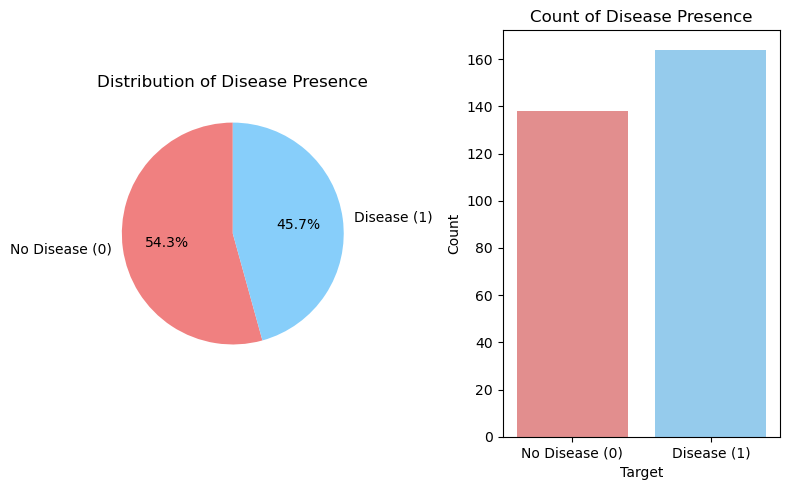

In [63]:

# Count the occurrences of each target value (0 and 1)
target_counts = data.target.value_counts()
print(target_counts)
# Create a pie chart for the distribution of 'target' values
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightskyblue']
labels = ['No Disease (0)', 'Disease (1)']
plt.pie(target_counts, labels=labels, colors=colors ,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Disease Presence')

# Count Plot
plt.subplot(1, 2, 2)
sns.countplot(x='target', palette=colors,data=data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Disease Presence')
plt.xticks([0, 1], labels)

plt.tight_layout()
plt.show()


In [64]:
target_by_sex = data[data['target'] == 1].groupby('sex')['target'].count()

target_by_sex
# Map sex values to meaningful labels

sex
0    72
1    92
Name: target, dtype: int64

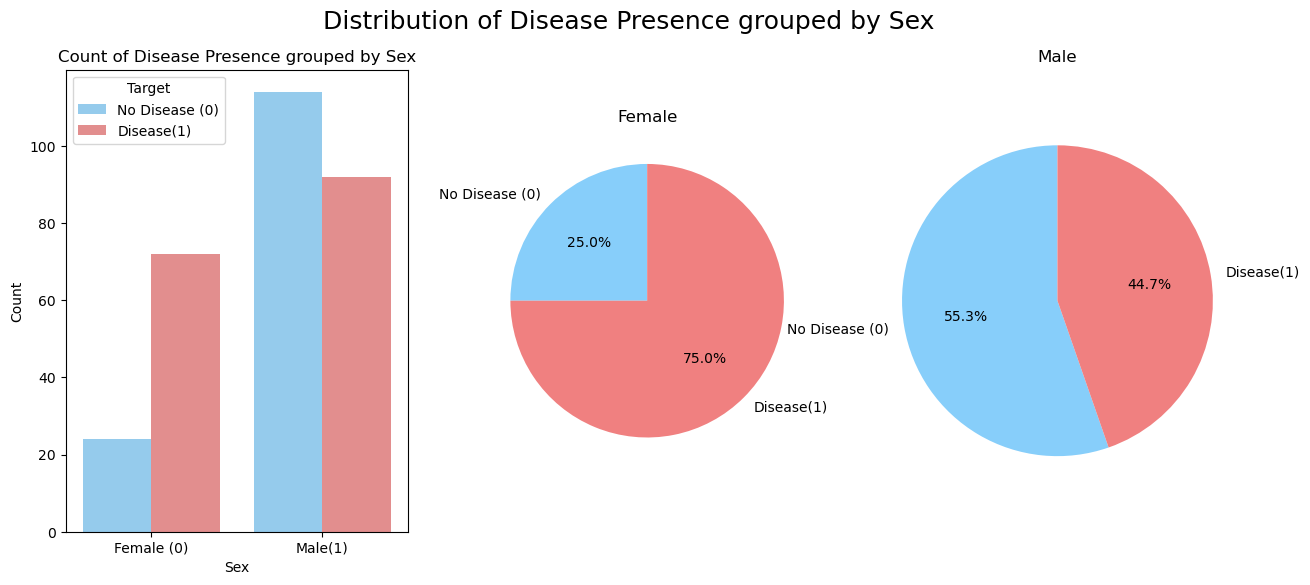

In [65]:

# Group the data by 'sex' and 'target' and calculate the count
grouped_data = data.groupby(['sex', 'target']).size().reset_index(name='count')

# Map sex values to meaningful labels
grouped_data['sex'] = grouped_data['sex'].map({1: 'Male', 0: 'Female'})

# Create a pivot table for easier pie chart creation
pivot_table = grouped_data.pivot(index='sex', columns='target', values='count').fillna(0)

# Create a pie chart for each 'sex' category
plt.figure(figsize=(15, 6))

colors=['lightskyblue', 'lightcoral']

labels = ['No Disease (0)', 'Disease(1)']

plt.subplot (1,3,1)
sns.countplot(x='sex', hue='target',palette=colors, data=data, hue_order=[0, 1])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Disease Presence grouped by Sex')
plt.legend(title='Target', loc='upper left', labels=['No Disease (0)', 'Disease(1)'])
plt.xticks([0, 1], ['Female (0)', 'Male(1)'])


# Plot pie chart for Female
plt.subplot(1, 3, 2)
plt.pie(pivot_table.loc['Female'], labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Female')

# Plot pie chart for Male
plt.subplot(1, 3, 3)
plt.pie(pivot_table.loc['Male'], labels=labels,autopct='%1.1f%%', colors=colors,startangle=90)
plt.title('Male')

# Add a common title for the subplots
plt.suptitle('Distribution of Disease Presence grouped by Sex', fontsize=18)

# Show the pie charts
plt.axis('equal')  # Equal aspect ratio ensures that the pie charts are drawn as circles.
plt.show()


In [66]:
exang_count = data['exang'].value_counts()
exang_count

0    203
1     99
Name: exang, dtype: int64

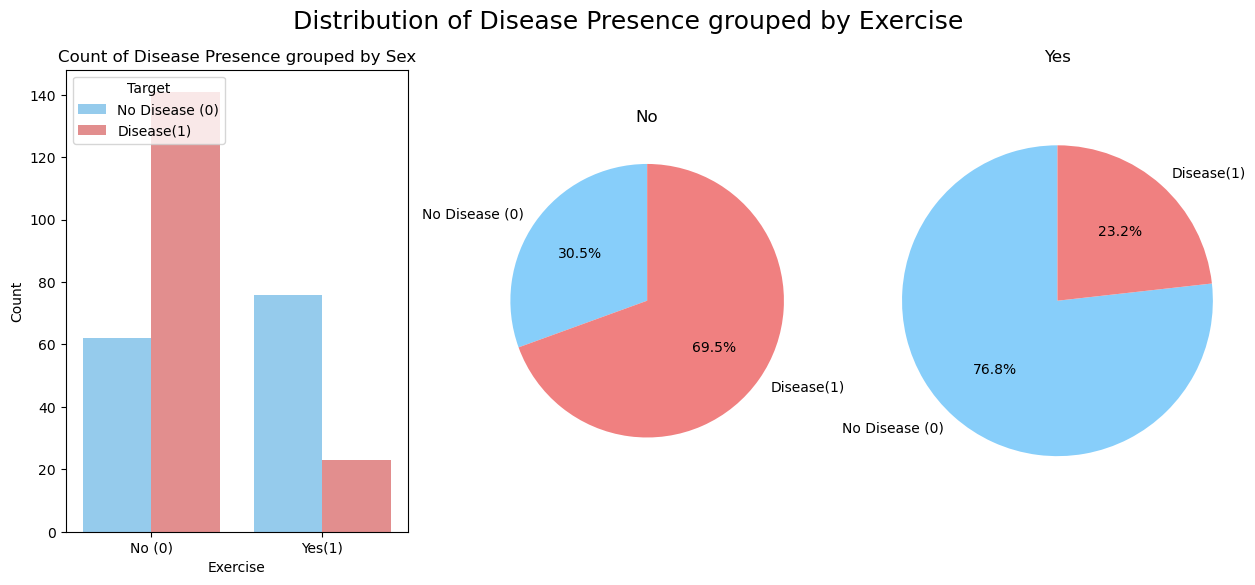

In [67]:

# Group the data by 'sex' and 'target' and calculate the count
grouped_data = data.groupby(['exang', 'target']).size().reset_index(name='count')

# Map sex values to meaningful labels
grouped_data['exang'] = grouped_data['exang'].map({1: 'Yes', 0: 'No'})

# Create a pivot table for easier pie chart creation
pivot_table = grouped_data.pivot(index='exang', columns='target', values='count').fillna(0)

# Create a pie chart for each 'sex' category
plt.figure(figsize=(15, 6))

colors=['lightskyblue', 'lightcoral']

labels = ['No Disease (0)', 'Disease(1)']

plt.subplot (1,3,1)
sns.countplot(x='exang', hue='target',palette=colors, data=data, hue_order=[0, 1])
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.title('Count of Disease Presence grouped by Sex')
plt.legend(title='Target', loc='upper left', labels=['No Disease (0)', 'Disease(1)'])
plt.xticks([0, 1], ['No (0)', 'Yes(1)'])


# Plot pie chart for Female
plt.subplot(1, 3, 2)
plt.pie(pivot_table.loc['No'], labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('No')

# Plot pie chart for Male
plt.subplot(1, 3, 3)
plt.pie(pivot_table.loc['Yes'], labels=labels,autopct='%1.1f%%', colors=colors,startangle=90)
plt.title('Yes')

# Add a common title for the subplots
plt.suptitle('Distribution of Disease Presence grouped by Exercise', fontsize=18)

# Show the pie charts
plt.axis('equal')  # Equal aspect ratio ensures that the pie charts are drawn as circles.
plt.show()


In [68]:
#data['age'][data["target"]==0].min()

In [69]:
#filtered_data = data[(data["target"] == 0) & (data["age"] == 35)]
#filtered_data

In [70]:
from scipy import stats

def outliers (data,threshold) :
    # Calculate mean and standard deviation of age
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate z-scores for each age data point
    z_scores = np.abs((data - mean) / std_dev)

    # Identify outliers
    outliers = np.where(z_scores > threshold)

    # Print the rows corresponding to outliers in the "age" column
    outlier_rows = data.iloc[outliers]
    print("Outliers:\n", outlier_rows)


In [71]:
import numpy as np

def identify_iqr_outliers(data, threshold=1.5):
    """
    Identify outliers using the Interquartile Range (IQR) method.
    
    Parameters:
        data (array-like): Input data.
        threshold (float): Threshold multiplier for defining outliers.
    
    Returns:
        outliers (array): Array of outlier values.
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers , lower_bound ,upper_bound



In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec



def plot (x_col  , data  ) : 
    
    colors = [ 'lightskyblue','lightcoral']
    target_0 = data[data['target'] == 0]
    
    target_1 = data[data['target'] == 1]
    
    fig = plt.figure(figsize=(20, 10))

    gs = gridspec.GridSpec(2, 3, figure=fig)

    ax = [fig.add_subplot(gs[i]) for i in range(6)]

    i=0 
    sns.histplot(data[x_col], bins=20, color='blue', kde=True, ax=ax[i])
    ax[i].set_xlabel(x_col)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'Histogram of {x_col} for No Disease')

    i=i+1
    sns.histplot(target_0[x_col], bins=20, color=colors[0], kde=True ,ax=ax[i])
    ax[i].set_xlabel(x_col)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'Histogram of {x_col} for No Disease')

    i=i+1

    sns.histplot(target_1[x_col], bins=20, color=colors[1], kde=True ,ax=ax[i])
    ax[i].set_xlabel(x_col)
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'Histogram of {x_col} for No Disease')

    i=i+1

    sns.boxplot(x='target', y=x_col, palette=colors, data=data, ax=ax[i])
    ax[i].set_xlabel('Target (Disease Presence)')
    ax[i].set_ylabel(x_col)
    ax[i].set_title(f'Distribution of Target by {x_col} (Box Plot)')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Disease', 'Disease'])

    i=i+1

    # Violin Plot
    sns.violinplot(x='target', y=x_col, palette=colors, data=data , ax=ax[i])
    ax[i].set_xlabel('Target (Disease Presence)')
    ax[i].set_ylabel(x_col)
    ax[i].set_title(f'Distribution of Target by {x_col} (Violin Plot)')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Disease', 'Disease'])

    i=i+1
    """
    sns.scatterplot(x=x_col,y= y_col, hue='target', data=data, palette=colors ,ax=ax[i])
    ax[i].set_xlabel(x_col);
    ax[i].set_ylabel(y_col);
    ax[i].set_title(f'Scatter Plot: {x_col} vs. {y_col}');
    ax[i].legend(title='Target', loc='lower right', labels=['No Disease', 'Disease']);

    i=i+1
    
    sns.swarmplot(data=data ,  y=x_col ,x='target' ,hue = 'target',   hue_order=[0, 1] , palette=colors ,ax=ax[i]);
    ax[i].set_xlabel(x_col);
    ax[i].set_ylabel('thalach');
    ax[i].set_title(f'Swarm Plot of {x_col} by Target')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Disease', 'Disease'])
    ax[i].legend(title='Target', loc='upper left', labels=['No Disease (0)', 'Disease(1)'])

    i=i+1
    """
    
    col_mean_by_target = data.groupby('target')[x_col].mean().reset_index()
    sns.barplot(x='target', y=x_col, data=col_mean_by_target, palette=colors, ax=ax[i])
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Disease', 'Disease'])
    ax[i].set_ylabel(f'Mean of {x_col}');
    ax[i].set_title(f'Mean {x_col} by Target')
    i=i+1


   # for i in range(6, 6):
       # ax[i].axis('off')

    plt.tight_layout()
    plt.show();






In [79]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


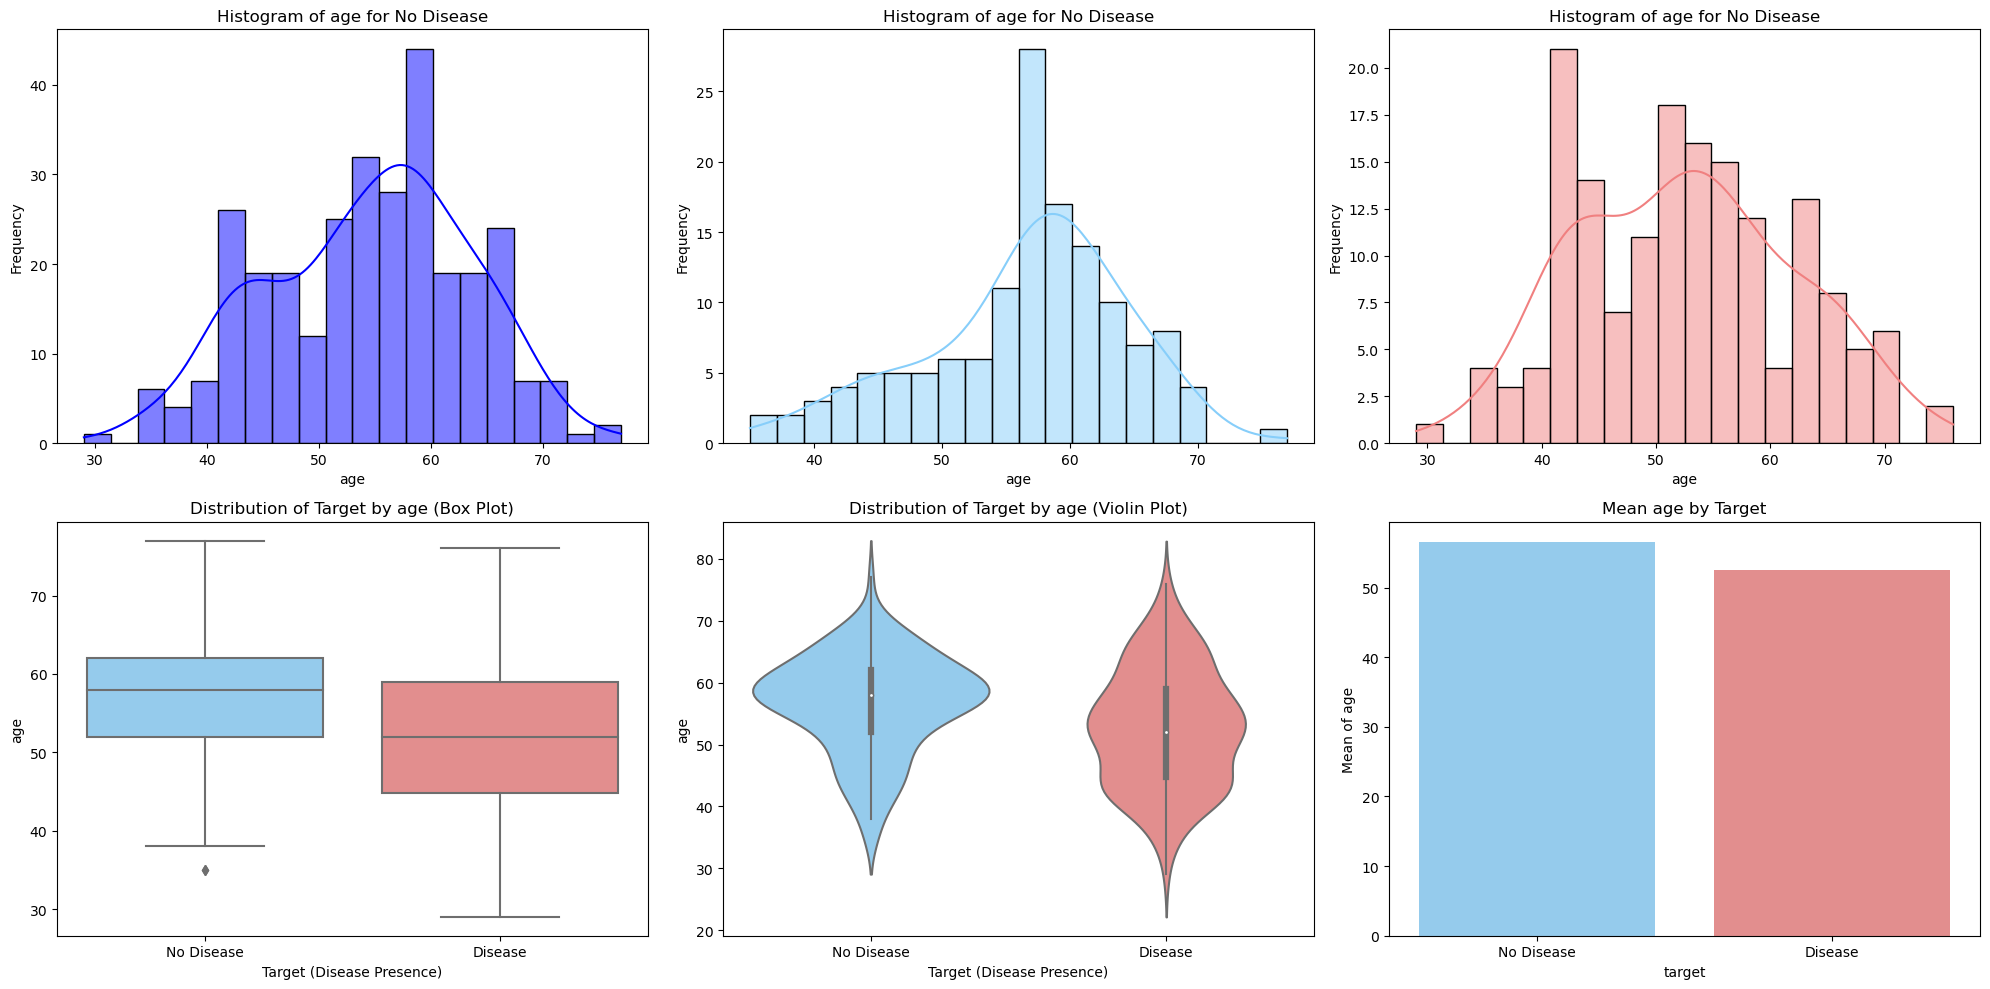

In [82]:
plot('age'  , data  ) 

In [83]:
outliers ,lower_bound, upper_bound= identify_iqr_outliers( data['age'], threshold=1.5)
print("Outliers:", outliers)


Outliers: Series([], Name: age, dtype: int64)


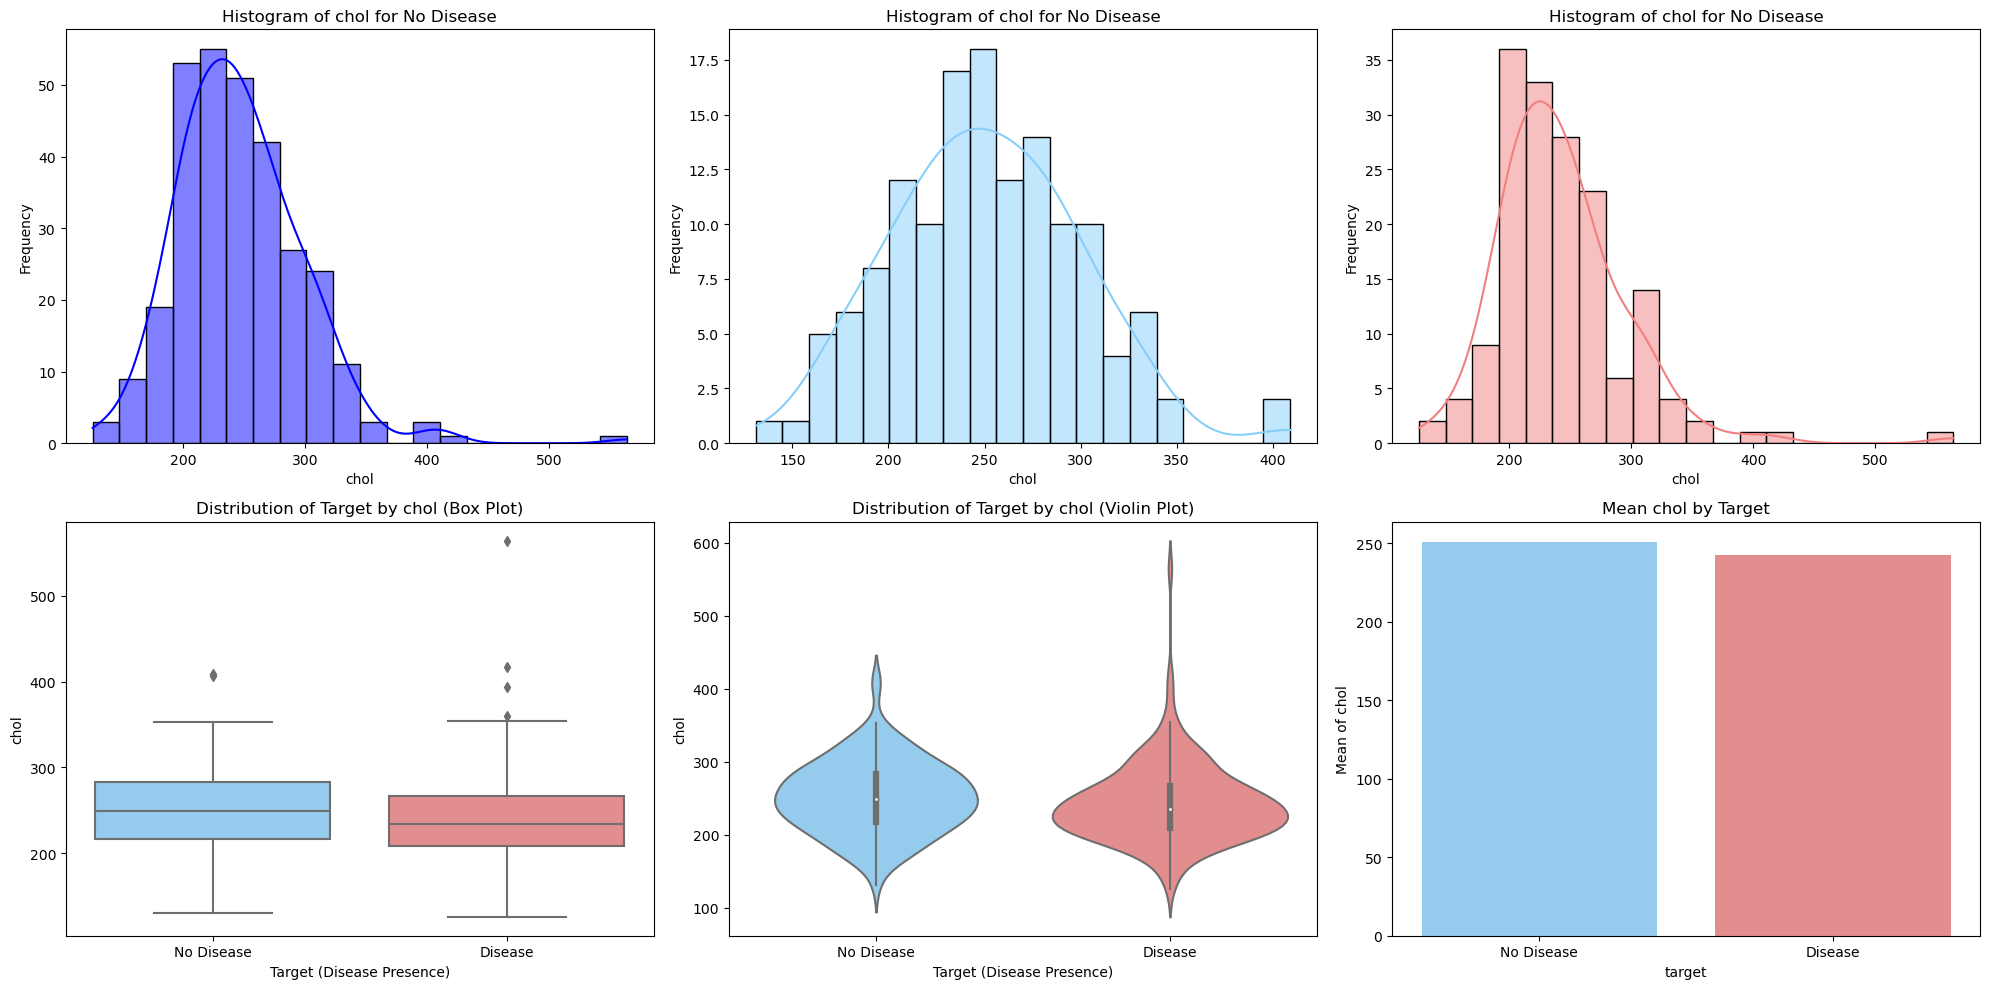

In [84]:
plot('chol'  , data  ) 

In [85]:
outliers ,lower_bound, upper_bound= identify_iqr_outliers( data['chol'], threshold=1.5)
print("Outliers:", outliers)


Outliers: 28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64


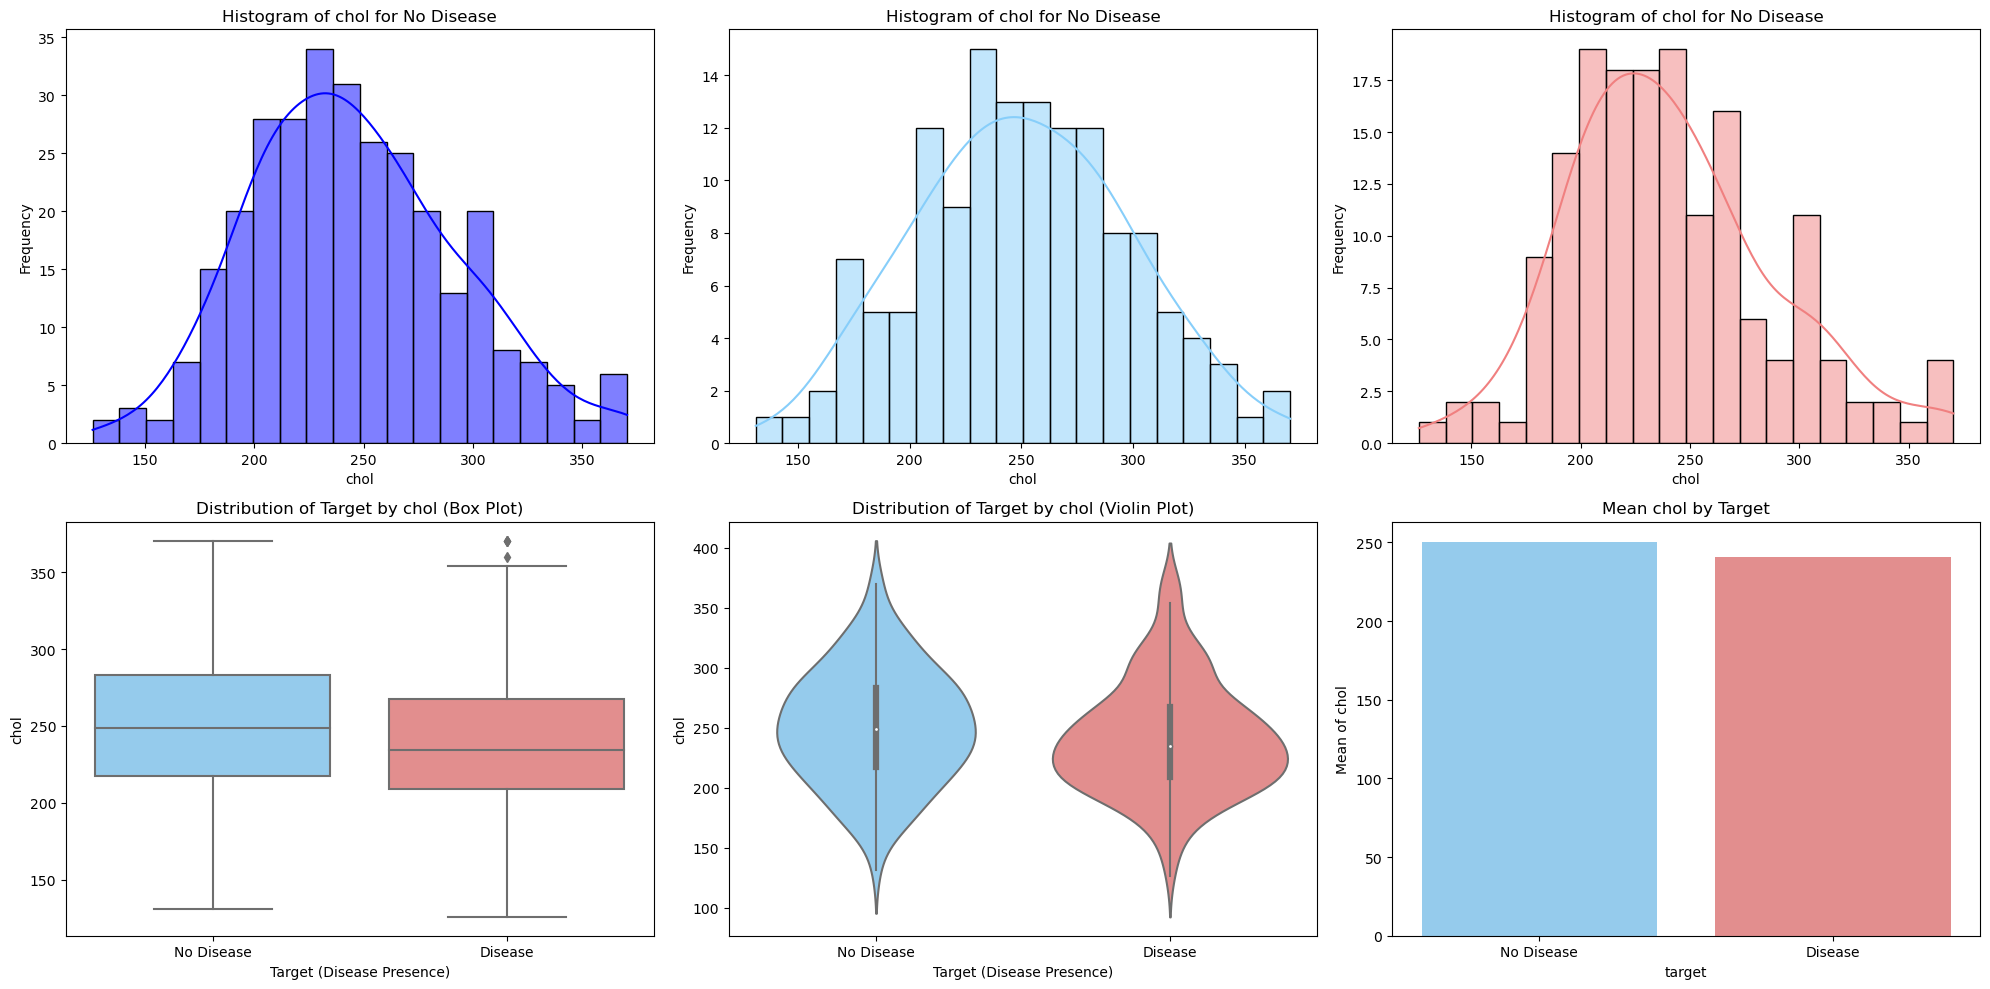

In [86]:
data['chol']= np.clip(data['chol'], lower_bound, upper_bound)
plot('chol'  , data  ) 

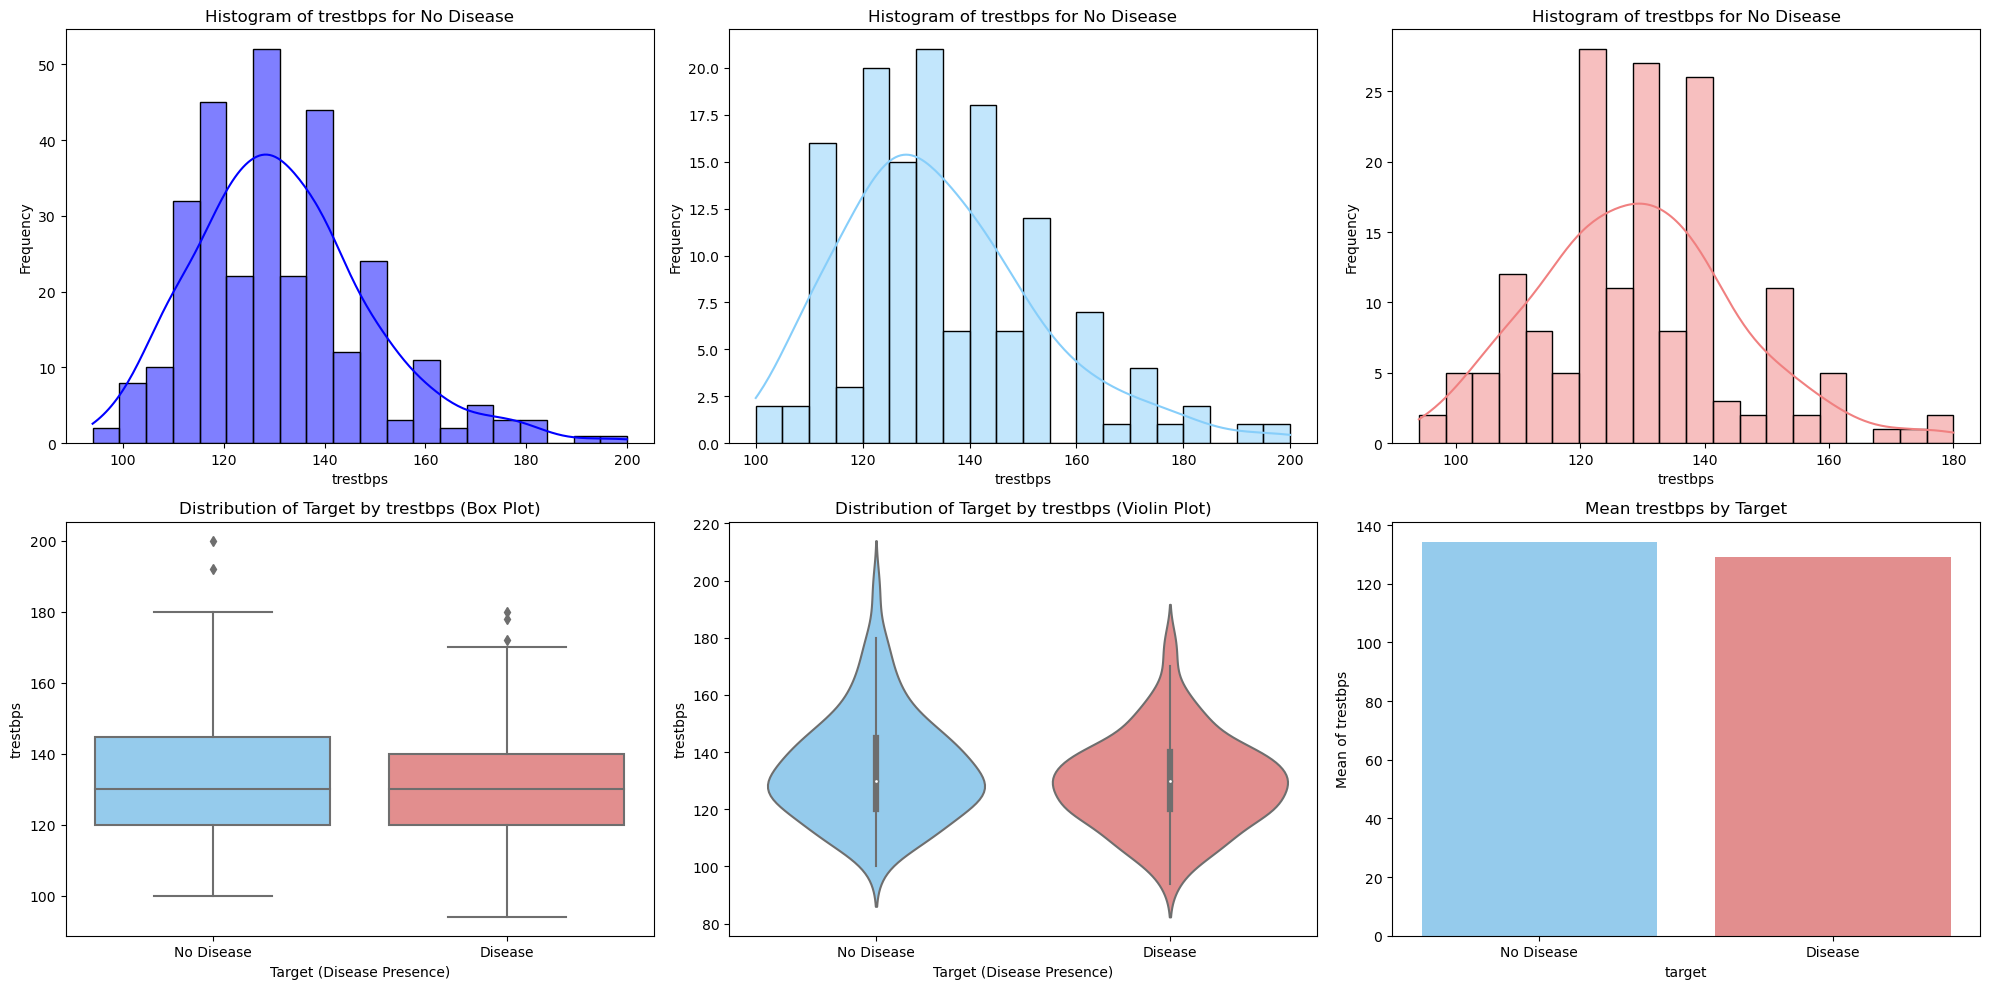

Outliers: 8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64


In [87]:
plot('trestbps'  , data  ) 

outliers ,lower_bound, upper_bound= identify_iqr_outliers( data['trestbps'], threshold=1.5)
print("Outliers:", outliers)


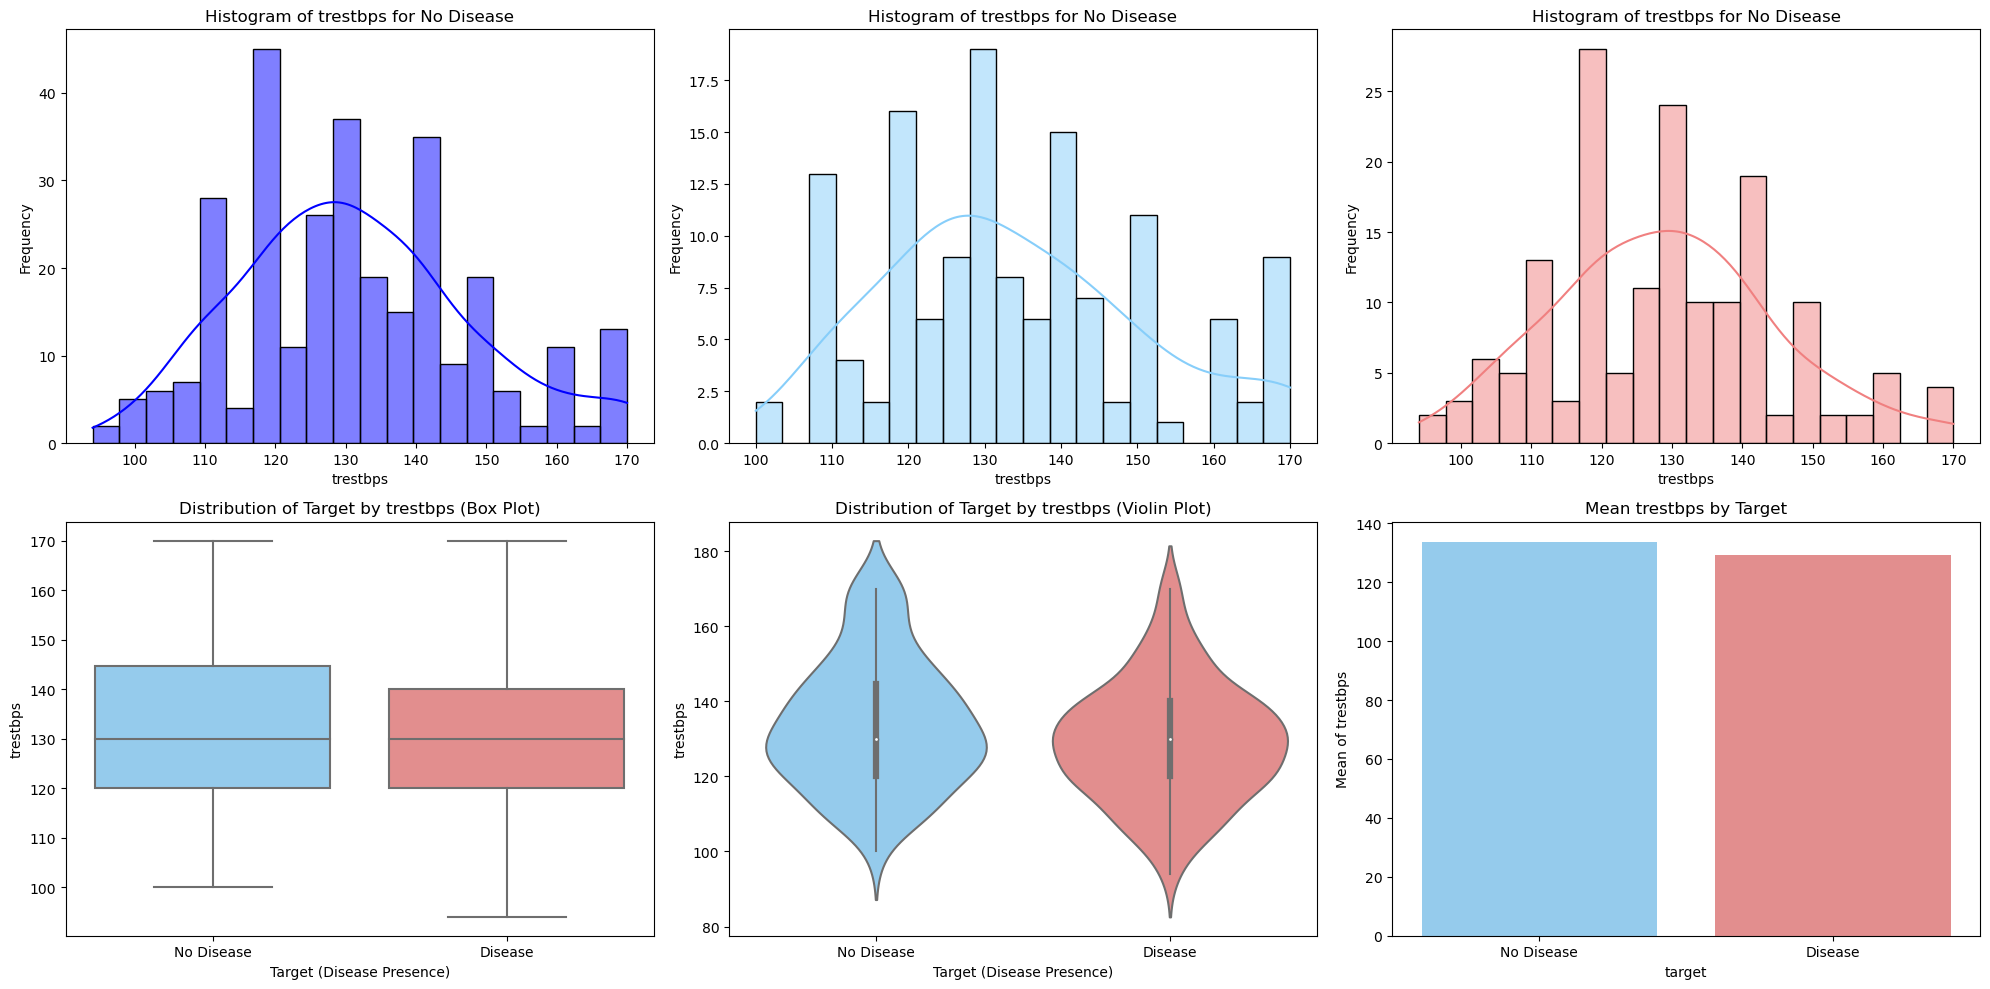

In [88]:
data['trestbps']= np.clip(data['trestbps'], lower_bound, upper_bound)
plot('trestbps'  , data  ) 

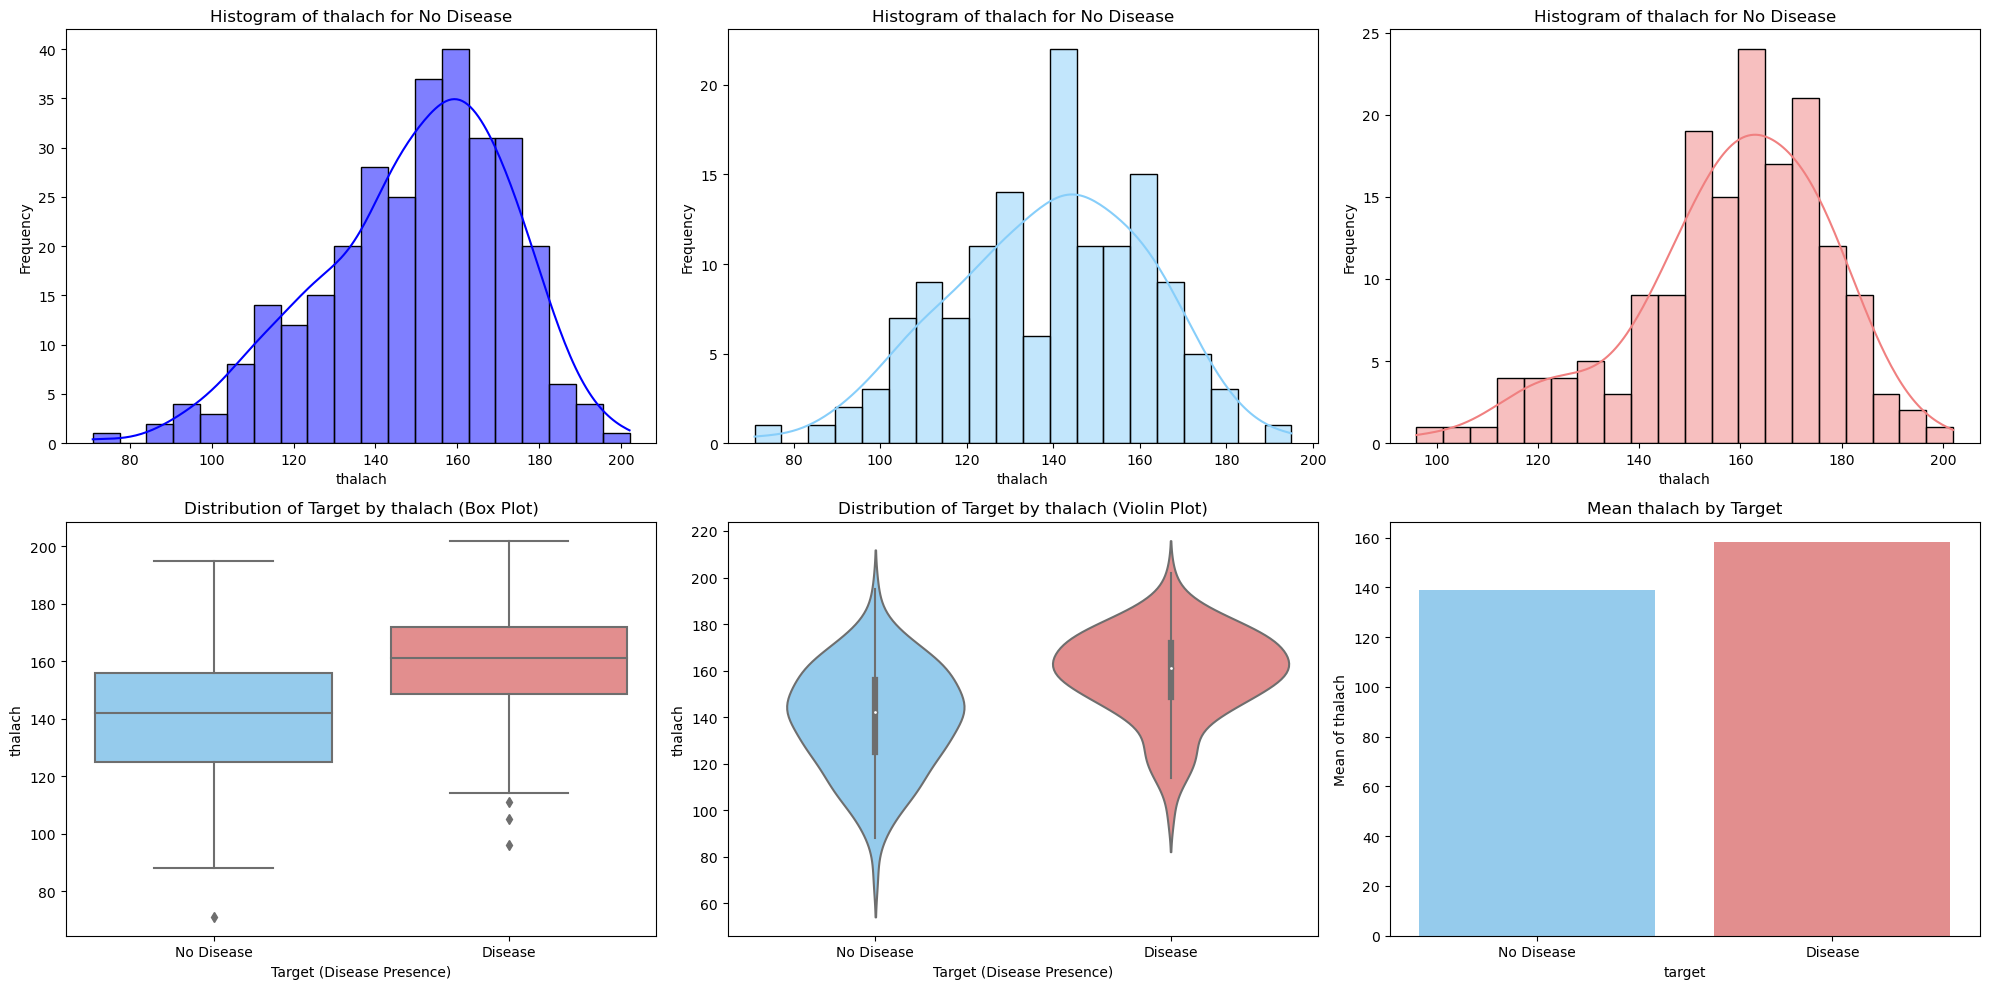

Outliers: 272    71
Name: thalach, dtype: int64


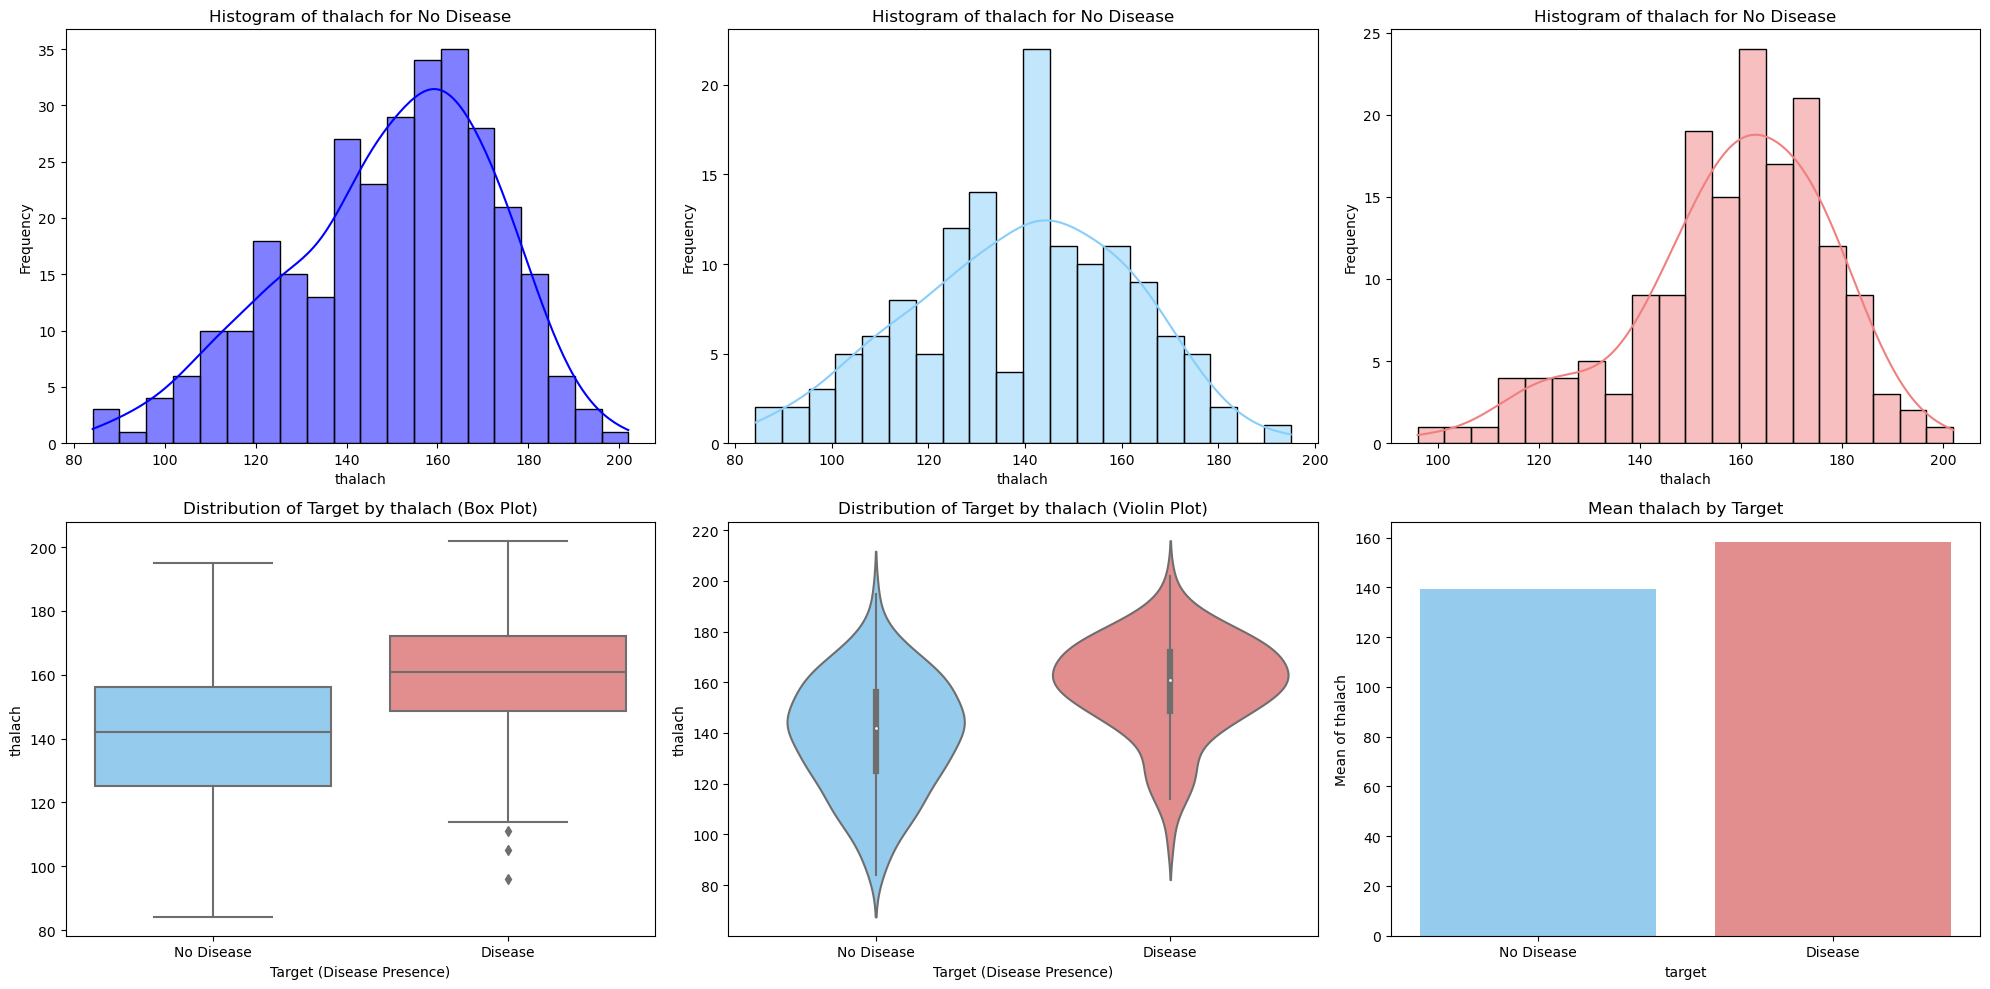

In [89]:
plot('thalach'  , data  ) 

outliers ,lower_bound, upper_bound= identify_iqr_outliers( data['thalach'], threshold=1.5)
print("Outliers:", outliers)
data['thalach']= np.clip(data['thalach'], lower_bound, upper_bound)
plot('thalach'  , data  ) 

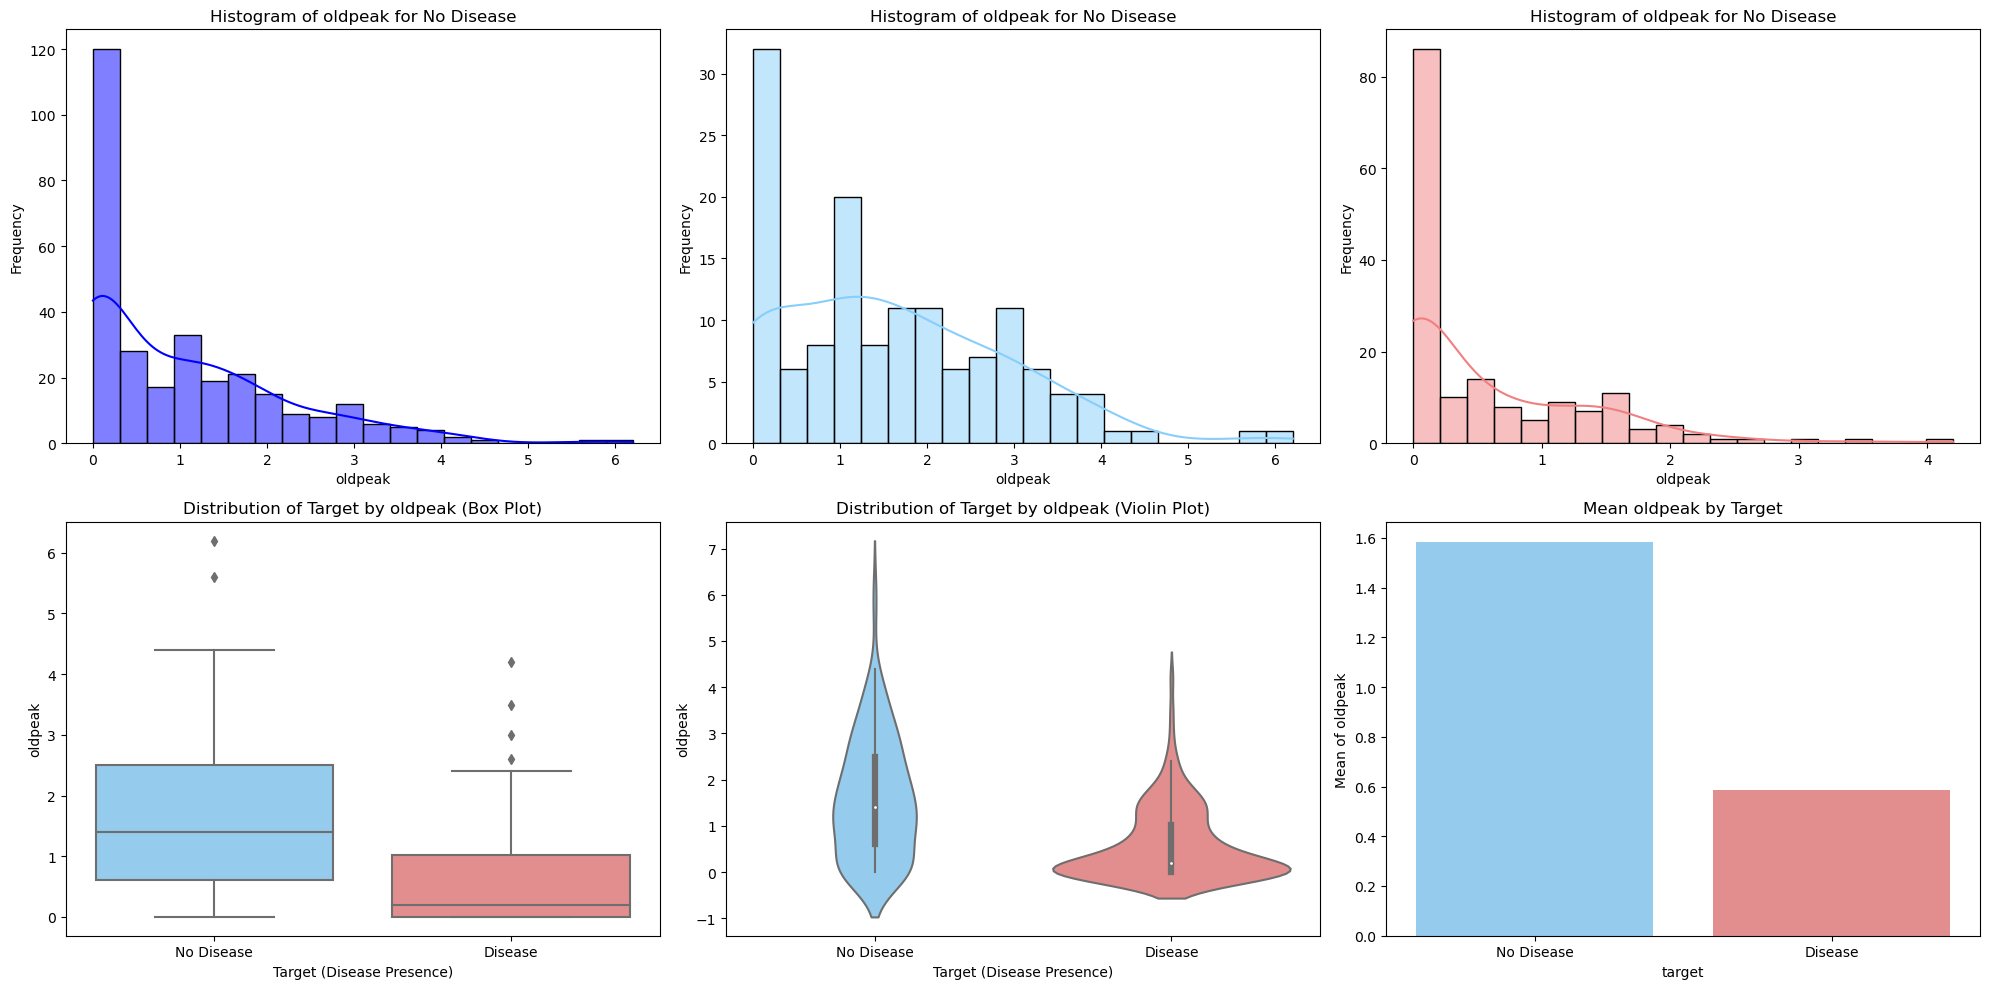

Outliers: 101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64


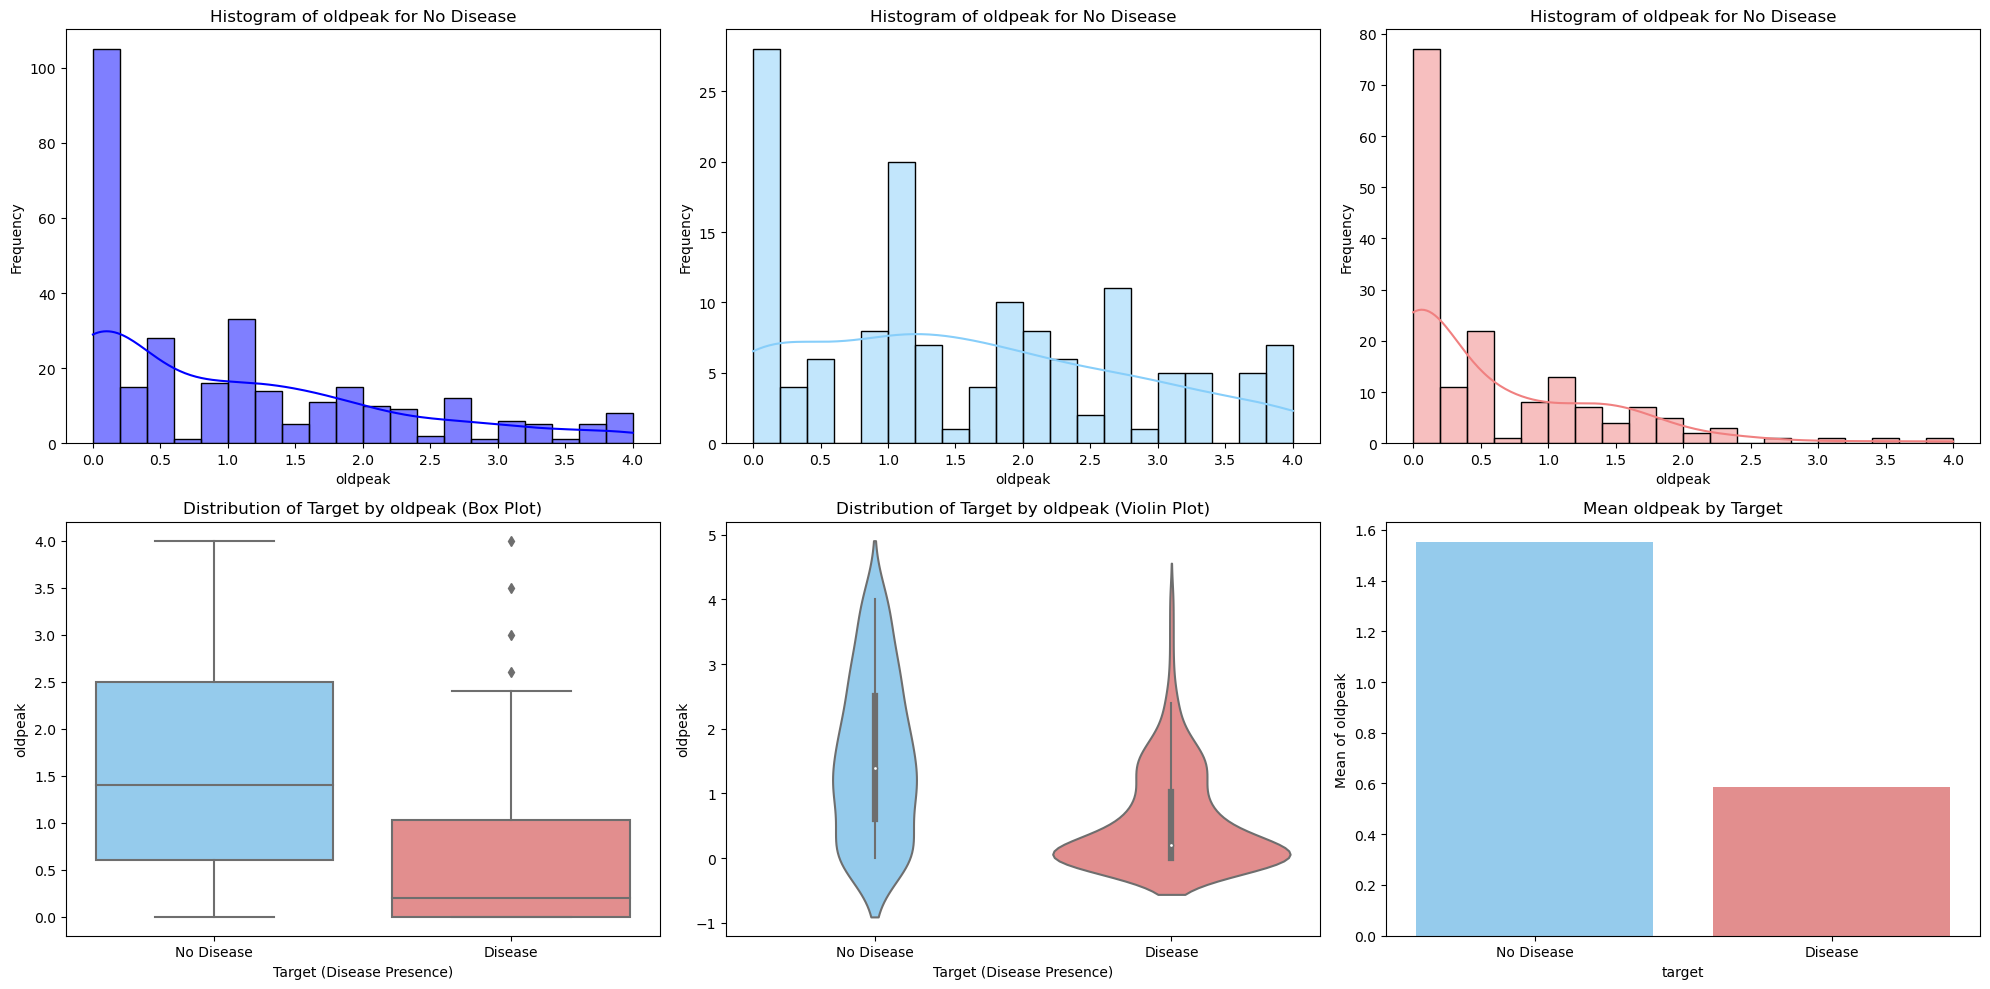

In [90]:
plot('oldpeak'  , data  ) 

outliers ,lower_bound, upper_bound= identify_iqr_outliers( data['oldpeak'], threshold=1.5)
print("Outliers:", outliers)
data['oldpeak']= np.clip(data['oldpeak'], lower_bound, upper_bound)
plot('oldpeak'  , data  ) 

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec



def plot_multivariant (x_col,y_col  , data  ) : 
    
    colors = [ 'lightskyblue','lightcoral']
    target_0 = data[data['target'] == 0]
    target_1 = data[data['target'] == 1]
    fig = plt.figure(figsize=(10, 5))

    gs = gridspec.GridSpec(1, 3, figure=fig)

    ax = [fig.add_subplot(gs[i]) for i in range(2)]

    i=0 
    sns.scatterplot(x=x_col,y= y_col, hue='target', data=data, palette=colors ,ax=ax[i])
    ax[i].set_xlabel(x_col);
    ax[i].set_ylabel(y_col);
    ax[i].set_title(f'Scatter Plot: {x_col} vs. {y_col}');
    ax[i].legend(title='Target', loc='lower right', labels=['No Disease', 'Disease']);

    i=i+1
    
    sns.swarmplot(data=data ,  y=x_col ,x='target' ,hue = 'target',   hue_order=[0, 1] , palette=colors ,ax=ax[i]);
    ax[i].set_xlabel(x_col);
    ax[i].set_ylabel(y_col);
    ax[i].set_title(f'Swarm Plot of {x_col} by Target')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Disease', 'Disease'])
    ax[i].legend(title='Target', loc='upper left', labels=['No Disease (0)', 'Disease(1)'])

    i=i+1
    

   # for i in range(6, 6):
       # ax[i].axis('off')

    plt.tight_layout()
    plt.show();






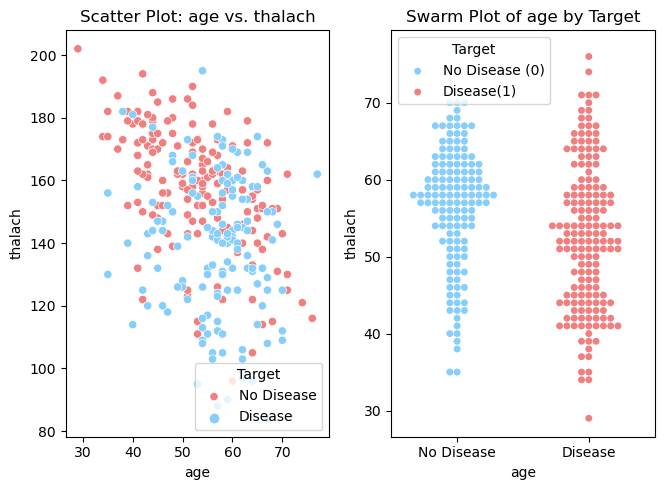

In [92]:
plot_multivariant('age' ,'thalach'  , data  ) 


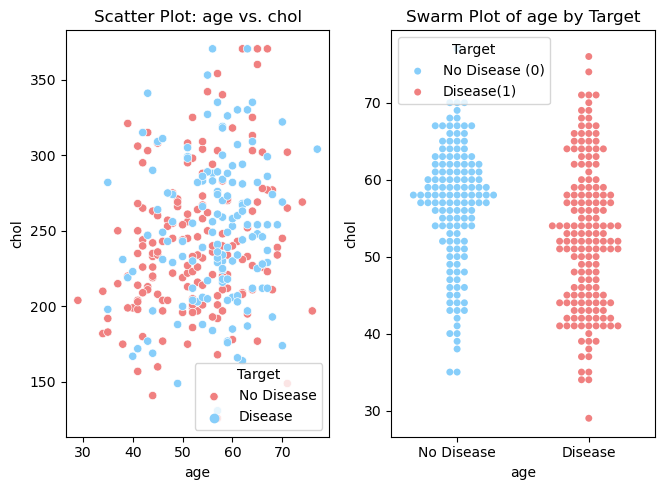

In [93]:
plot_multivariant('age' ,'chol'  , data  ) 


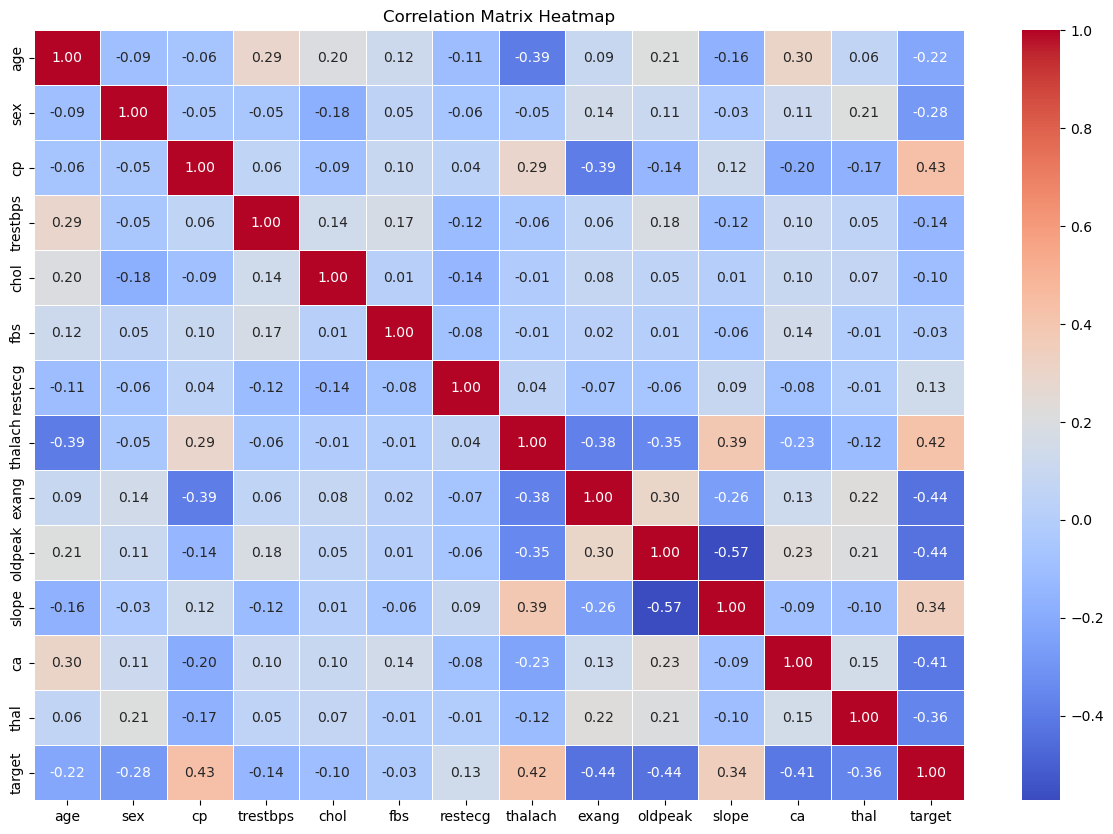

In [94]:
correlation_matrix = data.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


# Independent (X) & Dependent (Y) Variable

In [95]:
X= data.drop(['target'], axis = 1).copy()
y = data['target'].copy()

In [96]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3


In [97]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [98]:
x_copy=X.copy()

In [99]:
X=x_copy.copy()
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3


# Data Prepration

# Split Train and Test Dataset

In [100]:
# Encoding categorical data

X = pd.get_dummies(X, columns=['cp','restecg','slope','thal'], dtype=int)


In [101]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.94979429,  0.68265615,  0.82892727, ...,  3.9721251 ,
        -1.11222167, -0.79525621],
       [-1.92854796,  0.68265615, -0.07590177, ..., -0.25175441,
         0.89910135, -0.79525621],
       [-1.48572607, -1.46486632, -0.07590177, ..., -0.25175441,
         0.89910135, -0.79525621],
       ...,
       [ 1.50332164,  0.68265615,  0.76860533, ..., -0.25175441,
        -1.11222167,  1.25745639],
       [ 0.28556146,  0.68265615, -0.07590177, ..., -0.25175441,
        -1.11222167,  1.25745639],
       [ 0.28556146, -1.46486632, -0.07590177, ..., -0.25175441,
         0.89910135, -0.79525621]])

# Split Train and Test Dataset

In [103]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=380)

In [104]:
print(np.unique(y_test, return_counts=True))


(array([0, 1], dtype=int64), array([31, 45], dtype=int64))


# Score Function

In [105]:
from sklearn.metrics import  make_scorer, recall_score, accuracy_score, precision_score ,f1_score


def recall_for_label_1(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[1]

# Create the scorer object
recall_scoreL1 = make_scorer(recall_for_label_1)
scorers = {
    'f1_score': make_scorer(f1_score),
    'precision_score': make_scorer(precision_score),    
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'recall_score_l1' : recall_scoreL1
}

# models

In [106]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Instantiate classifiers for each algorithm
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svc_classifier = SVC()
knn_classifier = KNeighborsClassifier()
adaboost_classifier = AdaBoostClassifier()

# Create a dictionary to store classifiers for each algorithm
classifiers = {
    'DT': dt_classifier,
    'RF': rf_classifier,
    'SVC': svc_classifier,
    'KNN': knn_classifier,
    'ADABOOST': adaboost_classifier
}

# show metrics

In [107]:
from tabulate import tabulate
from sklearn.metrics import  classification_report,confusion_matrix

def show_metrics (train_f1 , test_f1 ,train_recall_label1,test_recall_label1 ,y_train_pred, y_test_pred ,confusion_matrix_test) :
    headers = ['Metrics', 'Training', 'Test']
    table_data = [
        ['F1-score', train_f1, test_f1],
        ['Recall for Label 1', train_recall_label1, test_recall_label1],
    ]

    print("\nPerformance Summary:")
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Print classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Print confusion matrix using BeautifulTable
    

    class_labels = ['No-Disease 0', 'Disease 1']

    print()
    print("Confusion Matrix for Testing Set:")
    print(tabulate(confusion_matrix_test, headers=class_labels, showindex=class_labels, tablefmt="grid"))
   

In [108]:
for algo, classifier in classifiers.items():
    print(f"Hyperparameters for {algo}:")
    hyperparameters = classifier.get_params()
    for param_name, param_value in hyperparameters.items():
        print(f"{param_name}")
    print("="*40)

Hyperparameters for DT:
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
random_state
splitter
Hyperparameters for RF:
bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start
Hyperparameters for SVC:
C
break_ties
cache_size
class_weight
coef0
decision_function_shape
degree
gamma
kernel
max_iter
probability
random_state
shrinking
tol
verbose
Hyperparameters for KNN:
algorithm
leaf_size
metric
metric_params
n_jobs
n_neighbors
p
weights
Hyperparameters for ADABOOST:
algorithm
base_estimator
estimator
learning_rate
n_estimators
random_state


# RandomizedSearchCV_wrapper

In [109]:

from sklearn.model_selection import RandomizedSearchCV


def RandomizedSearchCV_wrapper(skf, refit_score, classifier ,  grid_params):
    # Perform Randomized Search for each algorithm
    
            
            
        grid_search = RandomizedSearchCV(
            classifier, 
            param_distributions=param_dist, 
            scoring=scorers,
            refit=refit_score,
            cv=skf,
            return_train_score=True,
            n_jobs=-1,
            verbose=40,
            error_score='raise'
        )
        # Fit
        grid_search.fit(X_train, y_train)
        """
        print(f"\nBest parameters for {algo}:")
        print(grid_search.best_params_)
        
        print(f"\n")
        if refit_score == 'f1_score':
            print("Best cross-validation F1-score:", grid_search.best_score_)
        elif refit_score == 'accuracy_score':
            print("Best cross-validation Recall for label 1:", grid_search.best_score_)
        elif refit_score == 'recall_score_l1':
            print("Best cross-validation Accuracy:", grid_search.best_score_)
        """
        best_params =grid_search.best_params_
        best_score = grid_search.best_score_
        # Get the best estimator
        best_classifier = grid_search.best_estimator_

        # Fit the best estimator on the entire training data
        best_classifier.fit(X_train, y_train)

        # Make predictions on the training and test data
        y_train_pred = best_classifier.predict(X_train)
        y_test_pred = best_classifier.predict(X_test)

        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        train_recall_label1 = recall_score(y_train, y_train_pred, pos_label=1)
        test_recall_label1 = recall_score(y_test, y_test_pred, pos_label=1)
       
        confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
        confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

       
        #return test_f1 , test_recall_label1, train_f1,train_recall_label1,test_recall_label1 ,y_train_pred , y_test_pred ,confusion_matrix_test
        random_result = {'train_f1': train_f1 ,
                  'test_f1': test_f1, 
                  'test_recall_label1': test_recall_label1, 
                  'train_recall_label1': train_recall_label1 ,
                  'test_recall_label1': test_recall_label1 , 
                  'y_train_pred':y_train_pred  , 
                  'y_test_pred' :y_test_pred , 
                  'confusion_matrix_test': confusion_matrix_test,
                  'best_params':best_params,
                  'best_score':best_score,
                  'classifier' :classifier
                 }
        return random_result

     


# GridSearchCV

In [110]:

from sklearn.model_selection import GridSearchCV,StratifiedKFold


#from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score
#from sklearn.metrics import classification_report, confusion_matrix


def GridSearchCV_wrapper (skf ,  refit_score ,classifiers,grid_params) : 
    # Perform Grid Search for each algorithm
    grid_results = []
    for algo in grid_params.keys():
        classifier = classifiers[algo]
        param_grid = grid_params[algo]
        #grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=custom_scoring, refit='recall_1', n_jobs=-1)
    
        print(f"\n\n **********************{algo}**************************\n")
    
        grid_search = GridSearchCV(classifier, 
                                   param_grid=param_grid,
                                   scoring=scorers,
                                   refit=refit_score ,
                                   #refit =True,
                                   cv=skf ,
                                   return_train_score=True , 
                                   n_jobs=-1, verbose=40 ,error_score='raise' )
        #fit
        grid_search.fit(X_train, y_train);
    
    
    
        
        print(f"\nBest parameters for {algo}:")
        print(grid_search.best_params_)
        
        print(f"\n")
        if refit_score == 'f1_score' :
            print("Best cross-validation F1-score fit:", grid_search.best_score_)
        elif refit_score == 'accuracy_score' :
            print("Best cross-validation Recall for label 1 fit:", grid_search.best_score_)
        elif refit_score=='recall_score_l1' :
            print("Best cross-validation Accuracy fit:", grid_search.best_score_)
    
        best_params =grid_search.best_params_
        best_score = grid_search.best_score_
        # Get the best estimator
        best_classifier = grid_search.best_estimator_
    
        # Fit the best estimator on the entire training data
        best_classifier.fit(X_train, y_train)
    
    
        # Make predictions on the training and test data
        y_train_pred = best_classifier.predict(X_train)
        y_test_pred = best_classifier.predict(X_test)
    
    
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)

    
        train_recall_label1 = recall_score(y_train, y_train_pred, pos_label=1)
        test_recall_label1 = recall_score(y_test, y_test_pred, pos_label=1)

        confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
        confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

        """
        headers = ['Metrics', 'Training', 'Test']
        table_data = [
            ['F1-score', train_f1, test_f1],
            ['Recall for Label 1', train_recall_label1, test_recall_label1],
        ]

        print("\nPerformance Summary:")
        print(tabulate(table_data, headers=headers, tablefmt="grid"))

       
        # Print classification report and confusion matrix
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))
        
            
        # Print confusion matrix using BeautifulTable
        
        class_labels = [' 0', ' 1']
      
        #print("Confusion Matrix for Training Set:")
        #print(tabulate(confusion_matrix_train, headers=class_labels, showindex=class_labels, tablefmt="grid"))
        print()
        print("Confusion Matrix for Testing Set:")
        print(tabulate(confusion_matrix_test, headers=class_labels, showindex=class_labels, tablefmt="grid"))
        """
        
        # ... perform some computations ...
        show_metrics (train_f1 , test_f1 ,train_recall_label1,test_recall_label1 ,y_train_pred, y_test_pred ,confusion_matrix_test)
        grid_result = {
            'train_f1': train_f1 ,
            'test_f1': test_f1, 
            'test_recall_label1': test_recall_label1, 
            'train_recall_label1': train_recall_label1 ,
             'test_recall_label1': test_recall_label1 , 
             'y_train_pred':y_train_pred  , 
             'y_test_pred' :y_test_pred , 
             'confusion_matrix_test': confusion_matrix_test,
             'best_params':best_params,
             'best_score':best_score,
             'classifier_name' :algo
        }
        grid_results.append(grid_result)
    return grid_results

       

# hyperparameters f1_score

In [111]:
# Hyperparameters for DT
dt_hyperparameters = {
    'ccp_alpha': [0.0 , 0.01],
    #'class_weight': [None],
    'criterion': [ 'entropy'],
    
    'max_depth': [3,4 ,21],
    'max_features': [None,  'sqrt', 'log2'],
    'max_leaf_nodes':[ 20 ,50,55],
    #'min_impurity_decrease': [0.0, 0.1, 0.01],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10 ,15],
    
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [42 ,50],
    #'splitter': ['best', 'random']
    'splitter': [ 'random']
    
}

# Hyperparameters for RF
rf_hyperparameters = {
    'bootstrap': [True],
    'ccp_alpha': [0.0 ,0,1],
    'class_weight': [None],
    'criterion': ['gini', 'entropy'],
    #'max_depth': [ 10, 20],
    'max_depth': [ 3],
    'max_features': [ 'sqrt', 'log2'],
    'max_leaf_nodes': [30],
   # 'max_samples': [None],
    #'min_impurity_decrease': [0.0, 0.1, 0.01],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'n_estimators': [30],
    'n_jobs': [-1],
    #'oob_score': [False, True],
   # 'random_state': [None],
    'random_state': [42],
    'verbose': [0],
    'warm_start': [False]
}

# Hyperparameters for SVC
svc_hyperparameters = {
    'C': [0.0001 ,0.1, 1.0, 10.0],
    #'break_ties': [False, True],
    'cache_size': [200],
    'class_weight': [None],
    'coef0': [0.0],
    'decision_function_shape': ['ovr', 'ovo'],
    'degree': [3],
    'gamma': ['scale', 'auto',1,2,3.10,20,50,100],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'kernel': ['linear'],
    'max_iter': [-1],
    'probability': [False, True],
    'random_state': [None ,0 ,42],
    #'shrinking': [ False],
    'tol': [0.001],
    'verbose': [False]
}

# Hyperparameters for KNN
knn_hyperparameters = {
   'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
    'algorithm': ['kd_tree'],
    'leaf_size': [20],
    #'metric': ['euclidean', 'manhattan','minkowski'],
   
    'metric': ['minkowski'],
    #'metric_params': [None],
    'n_jobs': [None ,-1],
    'n_neighbors': [2,3,5,10,14 , 20 ,21],
    'p': [2],
    'weights': ['uniform', 'distance']
}

# Hyperparameters for ADABOOST
adaboost_hyperparameters = {
    
    'algorithm': ['SAMME'],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2) ,SVC(kernel='poly')],   # You may need to specify the base estimator
    #'estimator': [50],  # You may need to specify the estimator
    'learning_rate': [0.1, 1.0],
    'n_estimators': [40,50 ,55],
    #'random_state': [None]
}


# Create a dictionary to store grid parameters for each algorithm
grid_params = {
    'DT': dt_hyperparameters,
    'RF': rf_hyperparameters,
    'SVC': svc_hyperparameters,
    'KNN': knn_hyperparameters,
    'ADABOOST': adaboost_hyperparameters
}



# Print the grid parameters for each algorithm
for algorithm, params in grid_params.items():
    print(f"Algorithm: {algorithm}")
    print(params)
    print("=" * 40)


Algorithm: DT
{'ccp_alpha': [0.0, 0.01], 'criterion': ['entropy'], 'max_depth': [3, 4, 21], 'max_features': [None, 'sqrt', 'log2'], 'max_leaf_nodes': [20, 50, 55], 'min_samples_leaf': [5, 10, 20], 'min_samples_split': [10, 15], 'random_state': [42, 50], 'splitter': ['random']}
Algorithm: RF
{'bootstrap': [True], 'ccp_alpha': [0.0, 0, 1], 'class_weight': [None], 'criterion': ['gini', 'entropy'], 'max_depth': [3], 'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': [30], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'min_weight_fraction_leaf': [0.0, 0.1], 'n_estimators': [30], 'n_jobs': [-1], 'random_state': [42], 'verbose': [0], 'warm_start': [False]}
Algorithm: SVC
{'C': [0.0001, 0.1, 1.0, 10.0], 'cache_size': [200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr', 'ovo'], 'degree': [3], 'gamma': ['scale', 'auto', 1, 2, 3.1, 20, 50, 100], 'kernel': ['linear'], 'max_iter': [-1], 'probability': [False, True], 'random_state': [None, 0, 42], 'tol': [0.0

# run RandomizedSearchCV_wrapper: f1_score

In [112]:

skf = StratifiedKFold(n_splits=3)
refit_score = 'f1_score'
desired_f1_score = 0.89  # Set the desired f1-score threshold
max_rounds_without_improvement = 30  # Set the maximum rounds without improvement

r_results = []

for algo in grid_params.keys():
    classifier = classifiers[algo]
    param_dist = grid_params[algo]
    max_test_f1 = 0.0
    best_result = None
    rounds_without_improvement = 0  # Initialize rounds without improvement counter

    while max_test_f1 < desired_f1_score and rounds_without_improvement < max_rounds_without_improvement:
        r_result = RandomizedSearchCV_wrapper(skf, refit_score, classifier, param_dist)
        current_test_f1 = r_result['test_f1']
        
        if current_test_f1 > max_test_f1:
            max_test_f1 = current_test_f1
            best_result = r_result
            rounds_without_improvement = 0  # Reset rounds without improvement
        else:
            rounds_without_improvement += 1  # Increment rounds without improvement

    if best_result is not None:
        r_results.append(best_result)

for r in r_results:
    print(r['classifier'])
    print('Best Parameters:', r['best_params'])
    print('Best Test F1-score:', r['test_f1'])
    print('-' * 40)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

# run GridSearchCV for each classifier to maximize f1_score up to 89%


In [113]:

skf = StratifiedKFold(n_splits=3) 
refit_score = 'f1_score'


rf1s =GridSearchCV_wrapper (skf ,  refit_score ,classifiers, grid_params ) 

#show_metrics (train_f1 , test_f1 ,train_recall_label1,test_recall_label1 ,y_train_pred, y_test_pred ,confusion_matrix_test)



 **********************DT**************************

Fitting 3 folds for each of 648 candidates, totalling 1944 fits

Best parameters for DT:
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}


Best cross-validation F1-score fit: 0.8042067937301044

Performance Summary:
+--------------------+------------+----------+
| Metrics            |   Training |     Test |
+====================+============+==========+
| F1-score           |   0.857143 | 0.875    |
+--------------------+------------+----------+
| Recall for Label 1 |   0.857143 | 0.933333 |
+--------------------+------------+----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.82      0.93      0.87        45

    accuracy                           0.84        76
   macro avg

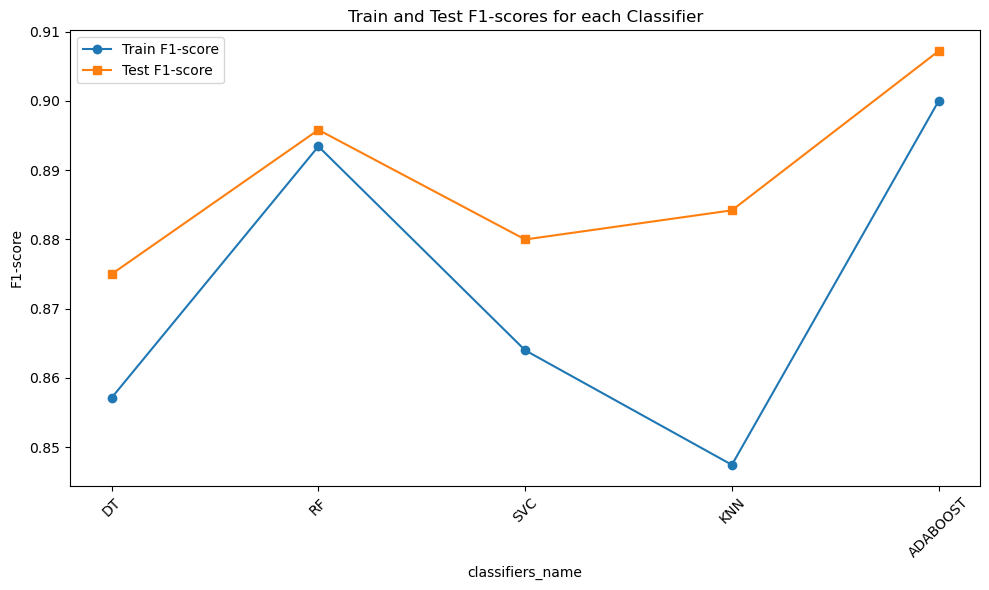

In [114]:
import matplotlib.pyplot as plt


classifiers_name = [rf1['classifier_name'] for rf1 in rf1s]
train_f1_scores = [rf1['train_f1'] for rf1 in rf1s]
test_f1_scores = [rf1['test_f1'] for rf1 in rf1s]

plt.figure(figsize=(10, 6))
plt.plot(classifiers_name, train_f1_scores, marker='o', label='Train F1-score')
plt.plot(classifiers_name, test_f1_scores, marker='s', label='Test F1-score')
plt.xlabel('classifiers_name')
plt.ylabel('F1-score')
plt.title('Train and Test F1-scores for each Classifier')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [115]:
# Hyperparameters for DT
dt_hyperparameters = {
  
    
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3 ,5 ],
    'max_features': [None],
    #'max_leaf_nodes': [None, 10, 20],
    #'min_impurity_decrease': [0.0, 0.1, 0.01],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'random_state': [None],
    'splitter': ['best', 'random']
}

# Hyperparameters for RF
rf_hyperparameters = {
    'bootstrap': [True],
    #'ccp_alpha': [0.0 ,0,1],
    #'class_weight': [None],
    'criterion': ['gini', 'entropy'],
    #'max_depth': [ 10, 20],
    'max_depth': [ 3],
    'max_features': [ 'sqrt', 'log2'],
    'max_leaf_nodes': [30],
   # 'max_samples': [None],
    #'min_impurity_decrease': [0.0, 0.1, 0.01],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    #'min_weight_fraction_leaf': [0.0, 0.1],
    'n_estimators': [30],
    'n_jobs': [-1],
    #'oob_score': [False, True],
   # 'random_state': [None],
    'random_state': [42],
    'verbose': [0],
    'warm_start': [False]
}

# Hyperparameters for SVC
svc_hyperparameters = {
     'C': [1, 5, 10, 15],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1, 0.5]
}

# Hyperparameters for KNN
knn_hyperparameters = {
   'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
   #'algorithm': ['kd_tree'],
    'leaf_size': [20],
    #'metric': ['euclidean', 'manhattan','minkowski'],
   
    'metric': ['minkowski'],
    #'metric_params': [None],
    'n_jobs': [None ,-1],
    'n_neighbors': [2,3,5,10,14 , 20 ,21],
    'p': [2],
    'weights': ['uniform', 'distance']
}

# Hyperparameters for ADABOOST
adaboost_hyperparameters = {
    
    'algorithm': ['SAMME'],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2) ,SVC(kernel='poly')],   # You may need to specify the base estimator
    #'estimator': [50],  # You may need to specify the estimator
    'learning_rate': [0.1, 1.0],
    'n_estimators': [40,50 ,55],
    #'random_state': [None]
}


# Create a dictionary to store grid parameters for each algorithm
grid_params = {
    'DT': dt_hyperparameters,
    'RF': rf_hyperparameters,
    'SVC': svc_hyperparameters,
    'KNN': knn_hyperparameters,
    'ADABOOST': adaboost_hyperparameters
}



# Print the grid parameters for each algorithm
for algorithm, params in grid_params.items():
    print(f"Algorithm: {algorithm}")
    print(params)
    print("=" * 40)


Algorithm: DT
{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 5], 'max_features': [None], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'random_state': [None], 'splitter': ['best', 'random']}
Algorithm: RF
{'bootstrap': [True], 'criterion': ['gini', 'entropy'], 'max_depth': [3], 'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': [30], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [30], 'n_jobs': [-1], 'random_state': [42], 'verbose': [0], 'warm_start': [False]}
Algorithm: SVC
{'C': [1, 5, 10, 15], 'kernel': ['linear'], 'gamma': ['auto', 0.1, 0.5]}
Algorithm: KNN
{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [20], 'metric': ['minkowski'], 'n_jobs': [None, -1], 'n_neighbors': [2, 3, 5, 10, 14, 20, 21], 'p': [2], 'weights': ['uniform', 'distance']}
Algorithm: ADABOOST
{'algorithm': ['SAMME'], 'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), SVC(kernel='poly')], 'learning_

# recall_score_l1 >89%

In [116]:

skf = StratifiedKFold(n_splits=3) 
refit_score = 'recall_score_l1'


recall1_result = GridSearchCV_wrapper (skf ,  refit_score ,classifiers, grid_params ) 
#show_metrics (train_f1 , test_f1 ,train_recall_label1,test_recall_label1 ,y_train_pred, y_test_pred ,confusion_matrix_test)



 **********************DT**************************

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best parameters for DT:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': None, 'splitter': 'random'}


Best cross-validation Accuracy fit: 0.8324786324786325

Performance Summary:
+--------------------+------------+----------+
| Metrics            |   Training |     Test |
+====================+============+==========+
| F1-score           |   0.918455 | 0.791209 |
+--------------------+------------+----------+
| Recall for Label 1 |   0.89916  | 0.8      |
+--------------------+------------+----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        31
           1       0.78      0.80      0.79        45

    accuracy                           0.75        76
   macro avg       0.74      0.74      0.74        76

C:\Users\SiminAlavizadeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SiminAlavizadeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SiminAlavizadeh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


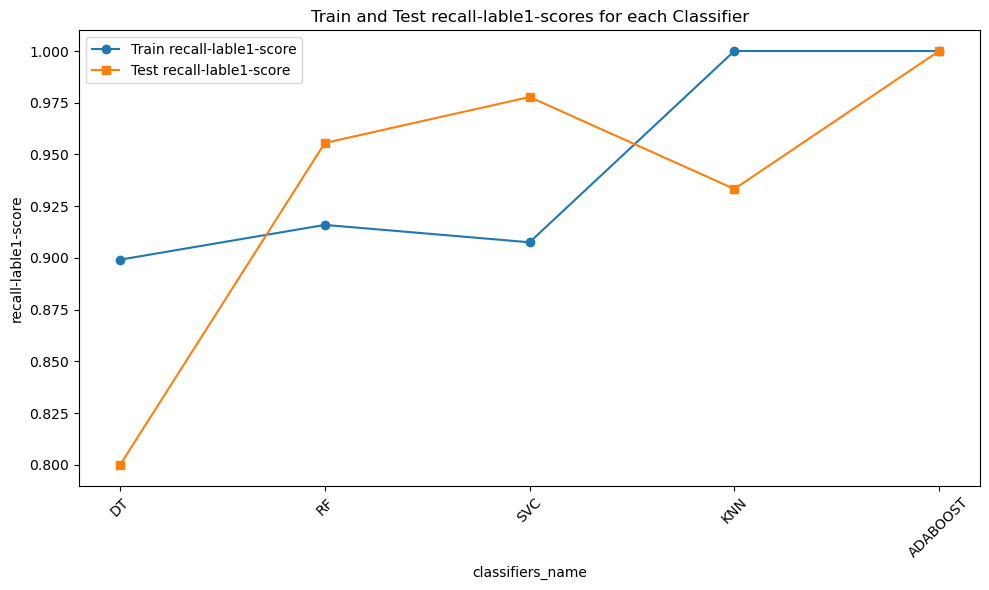

In [117]:
import matplotlib.pyplot as plt


classifiers_name = [rf1['classifier_name'] for rf1 in recall1_result]
train_f1_scores = [rf1['train_recall_label1'] for rf1 in recall1_result]
test_f1_scores = [rf1['test_recall_label1'] for rf1 in recall1_result]

plt.figure(figsize=(10, 6))
plt.plot(classifiers_name, train_f1_scores, marker='o', label='Train recall-lable1-score')
plt.plot(classifiers_name, test_f1_scores, marker='s', label='Test recall-lable1-score')
plt.xlabel('classifiers_name')
plt.ylabel('recall-lable1-score')
plt.title('Train and Test recall-lable1-scores for each Classifier')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [118]:
#simin Alavizafdeh